<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://survey.keis.or.kr/goms/gomsdownload/List.jsp

- **행정동별 주민등록 인구 및 세대현황**
- 거주지의 인구 구조 시각화를 통한 인구 현황 분석
- 인구증가율, 인구밀도 분석 및 도시화 현황 분석
- 사회, 경제, 정책, 건강 등 여러 분야에 적용할 수 있는 인사이트를 도출 조사

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [45]:
import numpy as np

In [46]:
import pandas as pd


## CSV 파일 데이터 읽어오기

In [47]:
df = pd.read_csv('./data/202309_202409_주민등록인구및세대현황_월간.csv', encoding='cp949')

In [48]:
# 읽어온 데이터프레임 확인하기
df

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
0,전국 (1000000000),"51,370,001","23,900,917",2.15,"25,592,335","25,777,666",0.99,"51,354,226","23,901,564",2.15,...,2.13,"25,522,808","25,733,703",0.99,"51,248,233","24,102,045",2.13,"25,517,454","25,730,779",0.99
1,서울특별시 (1100000000),"9,407,540","4,475,726",2.10,"4,552,501","4,855,039",0.94,"9,400,249","4,472,603",2.10,...,2.08,"4,518,536","4,837,265",0.93,"9,350,995","4,487,671",2.08,"4,515,791","4,835,204",0.93
2,부산광역시 (2600000000),"3,300,836","1,565,115",2.11,"1,609,650","1,691,186",0.95,"3,298,213","1,564,546",2.11,...,2.09,"1,594,978","1,680,615",0.95,"3,273,473","1,570,953",2.08,"1,593,783","1,679,690",0.95
3,대구광역시 (2700000000),"2,377,801","1,092,536",2.18,"1,168,679","1,209,122",0.97,"2,376,978","1,092,922",2.17,...,2.15,"1,161,164","1,204,869",0.96,"2,365,523","1,102,902",2.14,"1,160,812","1,204,711",0.96
4,인천광역시 (2800000000),"2,987,918","1,344,029",2.22,"1,494,725","1,493,193",1.00,"2,990,276","1,345,719",2.22,...,2.20,"1,506,680","1,508,090",1.00,"3,016,520","1,370,309",2.20,"1,507,439","1,509,081",1.00
5,광주광역시 (2900000000),"1,422,999","656,061",2.17,"702,748","720,251",0.98,"1,421,760","655,675",2.17,...,2.15,"697,079","714,984",0.97,"1,411,357","658,210",2.14,"696,711","714,646",0.97
6,대전광역시 (3000000000),"1,444,595","680,653",2.12,"720,520","724,075",1.00,"1,443,965","680,363",2.12,...,2.10,"717,878","722,048",0.99,"1,440,456","687,909",2.09,"718,109","722,347",0.99
7,울산광역시 (3100000000),"1,104,167","489,298",2.26,"567,314","536,853",1.06,"1,104,031","489,851",2.25,...,2.22,"565,290","533,941",1.06,"1,098,728","494,664",2.22,"565,067","533,661",1.06
8,세종특별자치시 (3600000000),"385,932","160,479",2.40,"192,246","193,686",0.99,"386,079","160,556",2.40,...,2.39,"193,826","195,544",0.99,"389,443","162,952",2.39,"193,854","195,589",0.99
9,경기도 (4100000000),"13,626,339","5,969,573",2.28,"6,855,626","6,770,713",1.01,"13,627,840","5,971,803",2.28,...,2.26,"6,875,411","6,800,462",1.01,"13,680,645","6,045,219",2.26,"6,877,300","6,803,345",1.01


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             19 non-null     object 
 1   2023년09월_총인구수    19 non-null     object 
 2   2023년09월_세대수     19 non-null     object 
 3   2023년09월_세대당 인구  19 non-null     float64
 4   2023년09월_남자 인구수  19 non-null     object 
 5   2023년09월_여자 인구수  19 non-null     object 
 6   2023년09월_남여 비율   19 non-null     float64
 7   2023년10월_총인구수    19 non-null     object 
 8   2023년10월_세대수     19 non-null     object 
 9   2023년10월_세대당 인구  19 non-null     float64
 10  2023년10월_남자 인구수  19 non-null     object 
 11  2023년10월_여자 인구수  19 non-null     object 
 12  2023년10월_남여 비율   19 non-null     float64
 13  2023년11월_총인구수    19 non-null     object 
 14  2023년11월_세대수     19 non-null     object 
 15  2023년11월_세대당 인구  19 non-null     float64
 16  2023년11월_남자 인구수  19 non-null     object 
 17  2023년11월_여자 인구수  1

In [50]:
df.shape

(19, 79)

In [51]:
df.head(3)

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
0,전국 (1000000000),"51,370,001","23,900,917",2.15,"25,592,335","25,777,666",0.99,"51,354,226","23,901,564",2.15,...,2.13,"25,522,808","25,733,703",0.99,"51,248,233","24,102,045",2.13,"25,517,454","25,730,779",0.99
1,서울특별시 (1100000000),"9,407,540","4,475,726",2.10,"4,552,501","4,855,039",0.94,"9,400,249","4,472,603",2.10,...,2.08,"4,518,536","4,837,265",0.93,"9,350,995","4,487,671",2.08,"4,515,791","4,835,204",0.93
2,부산광역시 (2600000000),"3,300,836","1,565,115",2.11,"1,609,650","1,691,186",0.95,"3,298,213","1,564,546",2.11,...,2.09,"1,594,978","1,680,615",0.95,"3,273,473","1,570,953",2.08,"1,593,783","1,679,690",0.95


## 자료구조 파악

In [52]:
df.describe()

,2023년09월_세대당 인구,2023년09월_남여 비율,2023년10월_세대당 인구,2023년10월_남여 비율,2023년11월_세대당 인구,2023년11월_남여 비율,2023년12월_세대당 인구,2023년12월_남여 비율,2024년01월_세대당 인구,2024년01월_남여 비율,...,2024년05월_세대당 인구,2024년05월_남여 비율,2024년06월_세대당 인구,2024년06월_남여 비율,2024년07월_세대당 인구,2024년07월_남여 비율,2024년08월_세대당 인구,2024년08월_남여 비율,2024년09월_세대당 인구,2024년09월_남여 비율
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.022105,0.948421,2.020000,0.948947,2.020000,0.948947,2.019474,0.948421,2.017895,0.948947,...,2.004211,0.947895,2.004211,0.947895,2.003684,0.947895,2.000526,0.947368,1.996842,0.947368
std,0.500994,0.231571,0.500466,0.231778,0.500466,0.231778,0.500372,0.231667,0.499918,0.231778,...,0.497006,0.231818,0.497006,0.231818,0.496781,0.231818,0.496012,0.231753,0.495357,0.231753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.040000,0.985000,2.040000,0.985000,2.040000,0.985000,2.040000,0.985000,2.040000,0.985000,...,2.025000,0.985000,2.025000,0.985000,2.025000,0.985000,2.020000,0.980000,2.020000,0.980000
50%,2.120000,1.000000,2.120000,1.000000,2.120000,1.000000,2.120000,1.000000,2.120000,1.000000,...,2.100000,1.000000,2.100000,1.000000,2.100000,1.000000,2.100000,1.000000,2.090000,1.000000
75%,2.175000,1.015000,2.170000,1.015000,2.170000,1.015000,2.170000,1.015000,2.165000,1.015000,...,2.150000,1.020000,2.150000,1.020000,2.150000,1.020000,2.150000,1.020000,2.140000,1.020000
max,2.400000,1.060000,2.400000,1.060000,2.400000,1.060000,2.400000,1.060000,2.400000,1.060000,...,2.390000,1.060000,2.390000,1.060000,2.390000,1.060000,2.390000,1.060000,2.390000,1.060000


## 데이터 타입, 인덱스, 컬럼명, Values 확인

In [53]:
df.columns

Index(['행정구역', '2023년09월_총인구수', '2023년09월_세대수', '2023년09월_세대당 인구',
       '2023년09월_남자 인구수', '2023년09월_여자 인구수', '2023년09월_남여 비율', '2023년10월_총인구수',
       '2023년10월_세대수', '2023년10월_세대당 인구', '2023년10월_남자 인구수', '2023년10월_여자 인구수',
       '2023년10월_남여 비율', '2023년11월_총인구수', '2023년11월_세대수', '2023년11월_세대당 인구',
       '2023년11월_남자 인구수', '2023년11월_여자 인구수', '2023년11월_남여 비율', '2023년12월_총인구수',
       '2023년12월_세대수', '2023년12월_세대당 인구', '2023년12월_남자 인구수', '2023년12월_여자 인구수',
       '2023년12월_남여 비율', '2024년01월_총인구수', '2024년01월_세대수', '2024년01월_세대당 인구',
       '2024년01월_남자 인구수', '2024년01월_여자 인구수', '2024년01월_남여 비율', '2024년02월_총인구수',
       '2024년02월_세대수', '2024년02월_세대당 인구', '2024년02월_남자 인구수', '2024년02월_여자 인구수',
       '2024년02월_남여 비율', '2024년03월_총인구수', '2024년03월_세대수', '2024년03월_세대당 인구',
       '2024년03월_남자 인구수', '2024년03월_여자 인구수', '2024년03월_남여 비율', '2024년04월_총인구수',
       '2024년04월_세대수', '2024년04월_세대당 인구', '2024년04월_남자 인구수', '2024년04월_여자 인구수',
       '2024년04월_남여 비율', '2024년05월_총인구수', '2024년05월_세대수', '202

In [54]:
df['행정구역']

0          전국  (1000000000)
1       서울특별시  (1100000000)
2       부산광역시  (2600000000)
3       대구광역시  (2700000000)
4       인천광역시  (2800000000)
5       광주광역시  (2900000000)
6       대전광역시  (3000000000)
7       울산광역시  (3100000000)
8     세종특별자치시  (3600000000)
9         경기도  (4100000000)
10    강원특별자치도  (5100000000)
11       충청북도  (4300000000)
12       충청남도  (4400000000)
13       전라북도  (4500000000)
14    전북특별자치도  (5200000000)
15       전라남도  (4600000000)
16       경상북도  (4700000000)
17       경상남도  (4800000000)
18    제주특별자치도  (5000000000)
Name: 행정구역, dtype: object

In [55]:
df.dtypes
# 숫자데이터가 object 처리됨.

행정구역                object
2023년09월_총인구수       object
2023년09월_세대수        object
2023년09월_세대당 인구    float64
2023년09월_남자 인구수     object
                    ...   
2024년09월_세대수        object
2024년09월_세대당 인구    float64
2024년09월_남자 인구수     object
2024년09월_여자 인구수     object
2024년09월_남여 비율     float64
Length: 79, dtype: object

In [56]:
# 행정구역 데이터 간소화(데이터명 변경)
df['행정구역'] = df['행정구역'].str.replace(r'\s*\(.*\)', '', regex=True)
df['행정구역']

0          전국
1       서울특별시
2       부산광역시
3       대구광역시
4       인천광역시
5       광주광역시
6       대전광역시
7       울산광역시
8     세종특별자치시
9         경기도
10    강원특별자치도
11       충청북도
12       충청남도
13       전라북도
14    전북특별자치도
15       전라남도
16       경상북도
17       경상남도
18    제주특별자치도
Name: 행정구역, dtype: object

In [58]:
# 행정구역 인덱스 지정
df = df.set_index('행정구역')

KeyError: "None of ['행정구역'] are in the columns"

## Null 데이터 확인

In [60]:
df.isnull().sum()

2023년09월_총인구수      0
2023년09월_세대수       0
2023년09월_세대당 인구    0
2023년09월_남자 인구수    0
2023년09월_여자 인구수    0
                  ..
2024년09월_세대수       0
2024년09월_세대당 인구    0
2024년09월_남자 인구수    0
2024년09월_여자 인구수    0
2024년09월_남여 비율     0
Length: 78, dtype: int64

# #3. 데이터 전처리 수행

## 컬럼 내용 변경하기

- 수치형 데이터로 변환 및 출력

In [62]:
# 데이터 내 컴마 제거 후 변환 
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(',', '').astype(int)

,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,2023년10월_남자 인구수,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
행정구역,,,,,,,,,,,,,,,,,,,,,
전국,51370001,23900917,2.15,25592335,25777666,0.99,51354226,23901564,2.15,25582773,...,2.13,25522808,25733703,0.99,51248233,24102045,2.13,25517454,25730779,0.99
서울특별시,9407540,4475726,2.10,4552501,4855039,0.94,9400249,4472603,2.10,4548150,...,2.08,4518536,4837265,0.93,9350995,4487671,2.08,4515791,4835204,0.93
부산광역시,3300836,1565115,2.11,1609650,1691186,0.95,3298213,1564546,2.11,1608156,...,2.09,1594978,1680615,0.95,3273473,1570953,2.08,1593783,1679690,0.95
대구광역시,2377801,1092536,2.18,1168679,1209122,0.97,2376978,1092922,2.17,1168087,...,2.15,1161164,1204869,0.96,2365523,1102902,2.14,1160812,1204711,0.96
인천광역시,2987918,1344029,2.22,1494725,1493193,1.00,2990276,1345719,2.22,1495744,...,2.20,1506680,1508090,1.00,3016520,1370309,2.20,1507439,1509081,1.00
광주광역시,1422999,656061,2.17,702748,720251,0.98,1421760,655675,2.17,702121,...,2.15,697079,714984,0.97,1411357,658210,2.14,696711,714646,0.97
대전광역시,1444595,680653,2.12,720520,724075,1.00,1443965,680363,2.12,720207,...,2.10,717878,722048,0.99,1440456,687909,2.09,718109,722347,0.99
울산광역시,1104167,489298,2.26,567314,536853,1.06,1104031,489851,2.25,567309,...,2.22,565290,533941,1.06,1098728,494664,2.22,565067,533661,1.06
세종특별자치시,385932,160479,2.40,192246,193686,0.99,386079,160556,2.40,192299,...,2.39,193826,195544,0.99,389443,162952,2.39,193854,195589,0.99


In [65]:
# 결측치 확인
df.isnull().sum()

2023년09월_총인구수      0
2023년09월_세대수       0
2023년09월_세대당 인구    0
2023년09월_남자 인구수    0
2023년09월_여자 인구수    0
                  ..
2024년09월_세대수       0
2024년09월_세대당 인구    0
2024년09월_남자 인구수    0
2024년09월_여자 인구수    0
2024년09월_남여 비율     0
Length: 78, dtype: int64

In [71]:
# 결측치를 0으로 처리하여 결측값 확인되지 않음. 0을 non으로 대체
df = df.replace(0, np.nan)
df.isnull().sum()

2023년09월_총인구수      1
2023년09월_세대수       1
2023년09월_세대당 인구    1
2023년09월_남자 인구수    1
2023년09월_여자 인구수    1
                  ..
2024년09월_세대수       1
2024년09월_세대당 인구    1
2024년09월_남자 인구수    1
2024년09월_여자 인구수    1
2024년09월_남여 비율     1
Length: 78, dtype: int64

In [72]:
# 결측값이 있는 행 확인
df[df.isnull().any(axis=1)]

,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,2023년10월_남자 인구수,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
행정구역,,,,,,,,,,,,,,,,,,,,,
전라북도,1758661.0,861647.0,2.04,875353.0,883308.0,0.99,1757295.0,861451.0,2.04,874659.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
전북특별자치도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.02,867993.0,875190.0,0.99,1741640.0,864068.0,2.02,867235.0,874405.0,0.99


In [80]:
# 헹장제도 개편으로 인한 전라북도-전북특별자치도 데이터 분리가 확인됨. 
# 이에, 데이터 분리된 시점 확인

for column in df.columns:
    if pd.isnull(df.loc['전라북도', column]) and not pd.isnull(df.loc['전북특별자치도', column]):
        print(f"전환 시점 발견: {column}")
        break

전환 시점 발견: 2024년01월_총인구수


In [81]:
# 전라북도와 전북특별자치도 데이터 통합
df.loc['전북특별자치도_통합'] = df.loc['전라북도'].fillna(df.loc['전북특별자치도'])

In [83]:
df.loc['전북특별자치도_통합']

2023년09월_총인구수      1758661.00
2023년09월_세대수        861647.00
2023년09월_세대당 인구          2.04
2023년09월_남자 인구수     875353.00
2023년09월_여자 인구수     883308.00
                      ...    
2024년09월_세대수        864068.00
2024년09월_세대당 인구          2.02
2024년09월_남자 인구수     867235.00
2024년09월_여자 인구수     874405.00
2024년09월_남여 비율           0.99
Name: 전북특별자치도_통합, Length: 78, dtype: float64

In [84]:
df.loc['전북특별자치도_통합'].isnull()

2023년09월_총인구수      False
2023년09월_세대수       False
2023년09월_세대당 인구    False
2023년09월_남자 인구수    False
2023년09월_여자 인구수    False
                   ...  
2024년09월_세대수       False
2024년09월_세대당 인구    False
2024년09월_남자 인구수    False
2024년09월_여자 인구수    False
2024년09월_남여 비율     False
Name: 전북특별자치도_통합, Length: 78, dtype: bool

In [101]:
# 전라북도 및 전북특별자치도 제거한 새 프레임 정의
df2 = df.drop(['전라북도', '전북특별자치도'])

In [102]:
df2.dtypes

2023년09월_총인구수      float64
2023년09월_세대수       float64
2023년09월_세대당 인구    float64
2023년09월_남자 인구수    float64
2023년09월_여자 인구수    float64
                    ...   
2024년09월_세대수       float64
2024년09월_세대당 인구    float64
2024년09월_남자 인구수    float64
2024년09월_여자 인구수    float64
2024년09월_남여 비율     float64
Length: 78, dtype: object

In [103]:
df2.head(3)

,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,2023년10월_남자 인구수,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
행정구역,,,,,,,,,,,,,,,,,,,,,
전국,51370001.0,23900917.0,2.15,25592335.0,25777666.0,0.99,51354226.0,23901564.0,2.15,25582773.0,...,2.13,25522808.0,25733703.0,0.99,51248233.0,24102045.0,2.13,25517454.0,25730779.0,0.99
서울특별시,9407540.0,4475726.0,2.10,4552501.0,4855039.0,0.94,9400249.0,4472603.0,2.10,4548150.0,...,2.08,4518536.0,4837265.0,0.93,9350995.0,4487671.0,2.08,4515791.0,4835204.0,0.93
부산광역시,3300836.0,1565115.0,2.11,1609650.0,1691186.0,0.95,3298213.0,1564546.0,2.11,1608156.0,...,2.09,1594978.0,1680615.0,0.95,3273473.0,1570953.0,2.08,1593783.0,1679690.0,0.95


In [104]:
# 인구수 데이터에 대해 int로 변환

for col in df2.columns:
    # 소수점이 모두 0인 열만 int로 변환
    if (df2[col] % 1 == 0).all():  # 모든 값이 정수인지 확인
        df2[col] = df2[col].astype(int)

In [105]:
df2.head(3)

,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,2023년10월_남자 인구수,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
행정구역,,,,,,,,,,,,,,,,,,,,,
전국,51370001,23900917,2.15,25592335,25777666,0.99,51354226,23901564,2.15,25582773,...,2.13,25522808,25733703,0.99,51248233,24102045,2.13,25517454,25730779,0.99
서울특별시,9407540,4475726,2.10,4552501,4855039,0.94,9400249,4472603,2.10,4548150,...,2.08,4518536,4837265,0.93,9350995,4487671,2.08,4515791,4835204,0.93
부산광역시,3300836,1565115,2.11,1609650,1691186,0.95,3298213,1564546,2.11,1608156,...,2.09,1594978,1680615,0.95,3273473,1570953,2.08,1593783,1679690,0.95


In [106]:
df2.describe()

,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,2023년10월_남자 인구수,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
count,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,...,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000
mean,5.707778e+06,2.655657e+06,2.134444,2.843593e+06,2.864185e+06,1.001111,5.706025e+06,2.655729e+06,2.132222,2.842530e+06,...,2.111667,2.835868e+06,2.859300e+06,1.000000,5.694248e+06,2.678005e+06,2.107778,2.835273e+06,2.858975e+06,1.000000
std,1.185944e+07,5.501232e+06,0.108964,5.907207e+06,5.952489e+06,0.030465,1.185596e+07,5.501373e+06,0.108820,5.905056e+06,...,0.109558,5.892634e+06,5.944327e+06,0.033781,1.183505e+07,5.547951e+06,0.110590,5.891530e+06,5.943801e+06,0.033781
min,3.859320e+05,1.604790e+05,1.980000,1.922460e+05,1.936860e+05,0.940000,3.860790e+05,1.605560e+05,1.980000,1.922990e+05,...,1.960000,1.938260e+05,1.955440e+05,0.930000,3.894430e+05,1.629520e+05,1.960000,1.938540e+05,1.955890e+05,0.930000
25%,1.466124e+06,7.007155e+05,2.045000,7.329225e+05,7.332018e+05,0.990000,1.465349e+06,7.004362e+05,2.045000,7.325135e+05,...,2.025000,7.296362e+05,7.305748e+05,0.990000,1.460444e+06,7.071828e+05,2.022500,7.297195e+05,7.307250e+05,0.990000
50%,1.967462e+06,9.722130e+05,2.130000,1.000347e+06,9.671155e+05,1.000000,1.967193e+06,9.724020e+05,2.125000,1.000320e+06,...,2.105000,9.997085e+05,9.641270e+05,1.000000,1.963434e+06,9.813875e+05,2.095000,9.995305e+05,9.639040e+05,1.000000
75%,3.189736e+06,1.479653e+06,2.177500,1.580919e+06,1.586106e+06,1.017500,3.188998e+06,1.480067e+06,2.170000,1.580053e+06,...,2.150000,1.572904e+06,1.580327e+06,1.020000,3.178353e+06,1.494860e+06,2.140000,1.572197e+06,1.580011e+06,1.020000
max,5.137000e+07,2.390092e+07,2.400000,2.559234e+07,2.577767e+07,1.060000,5.135423e+07,2.390156e+07,2.400000,2.558277e+07,...,2.390000,2.552281e+07,2.573370e+07,1.060000,5.124823e+07,2.410204e+07,2.390000,2.551745e+07,2.573078e+07,1.060000


In [107]:
# 지수 표기법 대신 일반 숫자 형식으로 출력 설정
pd.options.display.float_format = '{:.2f}'.format

# describe 출력
df2.describe()

,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,2023년10월_총인구수,2023년10월_세대수,2023년10월_세대당 인구,2023년10월_남자 인구수,...,2024년08월_세대당 인구,2024년08월_남자 인구수,2024년08월_여자 인구수,2024년08월_남여 비율,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,...,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,5707777.89,2655657.44,2.13,2843592.78,2864185.11,1.00,5706025.11,2655729.33,2.13,2842530.33,...,2.11,2835867.56,2859300.33,1.00,5694248.11,2678005.00,2.11,2835272.67,2858975.44,1.00
std,11859435.37,5501231.83,0.11,5907207.04,5952489.10,0.03,11855961.14,5501373.30,0.11,5905055.60,...,0.11,5892634.13,5944326.60,0.03,11835050.16,5547950.83,0.11,5891529.60,5943800.96,0.03
min,385932.00,160479.00,1.98,192246.00,193686.00,0.94,386079.00,160556.00,1.98,192299.00,...,1.96,193826.00,195544.00,0.93,389443.00,162952.00,1.96,193854.00,195589.00,0.93
25%,1466124.25,700715.50,2.04,732922.50,733201.75,0.99,1465348.75,700436.25,2.04,732513.50,...,2.02,729636.25,730574.75,0.99,1460444.50,707182.75,2.02,729719.50,730725.00,0.99
50%,1967462.50,972213.00,2.13,1000347.00,967115.50,1.00,1967193.00,972402.00,2.12,1000320.00,...,2.10,999708.50,964127.00,1.00,1963434.50,981387.50,2.09,999530.50,963904.00,1.00
75%,3189736.25,1479653.00,2.18,1580918.75,1586106.00,1.02,3188998.25,1480067.25,2.17,1580053.00,...,2.15,1572903.50,1580327.00,1.02,3178352.75,1494860.00,2.14,1572197.00,1580010.75,1.02
max,51370001.00,23900917.00,2.40,25592335.00,25777666.00,1.06,51354226.00,23901564.00,2.40,25582773.00,...,2.39,25522808.00,25733703.00,1.06,51248233.00,24102045.00,2.39,25517454.00,25730779.00,1.06


## Null 데이터 확인

In [108]:
df2.isnull().sum()

2023년09월_총인구수      0
2023년09월_세대수       0
2023년09월_세대당 인구    0
2023년09월_남자 인구수    0
2023년09월_여자 인구수    0
                  ..
2024년09월_세대수       0
2024년09월_세대당 인구    0
2024년09월_남자 인구수    0
2024년09월_여자 인구수    0
2024년09월_남여 비율     0
Length: 78, dtype: int64

# #4. 데이터 분석 및 시각화

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 무시해도 되는 warrning 무시

In [116]:
import matplotlib.font_manager as fm

# 컴퓨터 환경에 있는 폰트 중 특정 폰트 찾기
for i in fm.fontManager.ttflist:
    if i.name.find('Core') != -1: 
        print(i.name)    

S-Core Dream
S-Core Dream
S-Core Dream
S-Core Dream
S-Core Dream
S-Core Dream
S-Core Dream
S-Core Dream
S-Core Dream


In [117]:
from matplotlib import rcParams
rcParams['font.family'] = 'S-Core Dream' # matplotlib에 사용할 기본 폰트 지정
rcParams['axes.unicode_minus'] = False # -축 깨질 때 false로 설정

## 4-1. 현황 분석

### 1) 지역별 인구 비율

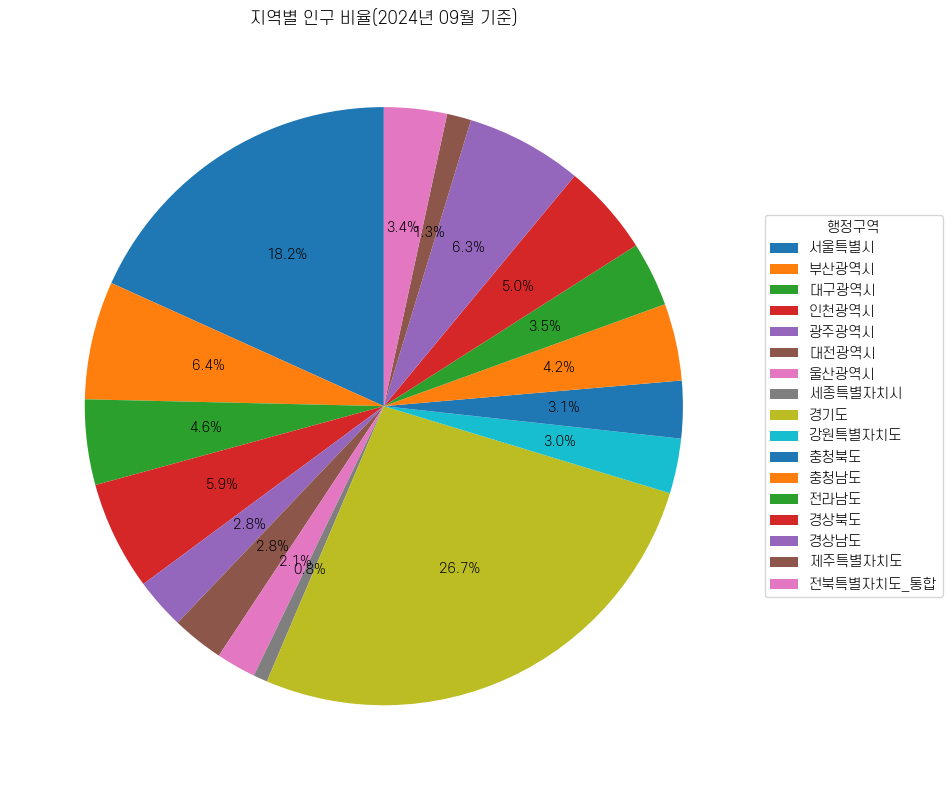

In [146]:
population = df2.loc[df2.index != '전국', '2024년09월_총인구수']

plt.figure(figsize=(20, 8))
plt.pie(population, autopct='%.1f%%', startangle=90)
plt.legend(population.index, title='행정구역', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'지역별 인구 비율(2024년 09월 기준)')

plt.tight_layout()
plt.show()

### 성비 확인

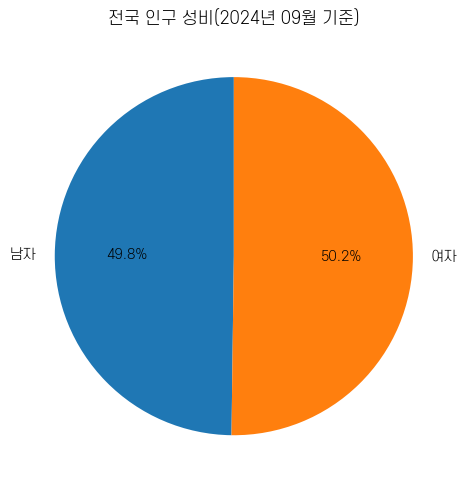

In [154]:
pop_s = df2.loc['전국', ['2024년09월_남자 인구수', '2024년09월_여자 인구수']]

plt.figure(figsize=(8, 5))
plt.pie(pop_s, labels=['남자', '여자'], autopct='%.1f%%', startangle=90)
plt.title(f'전국 인구 성비(2024년 09월 기준)')

plt.tight_layout()
plt.show()

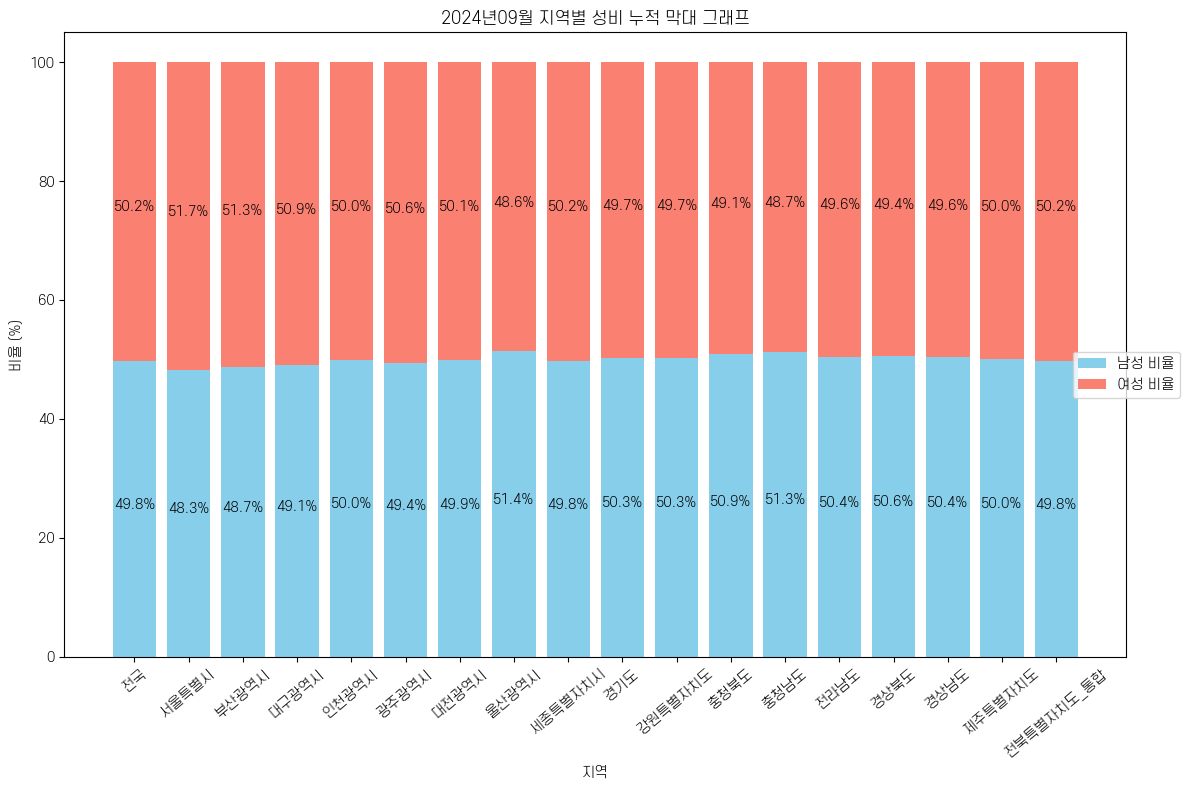

In [164]:
# 남성 비율과 여성 비율 계산
df2['남성 비율'] = df2['2024년09월_남자 인구수'] / (df2['2024년09월_남자 인구수'] + df2['2024년09월_여자 인구수']) * 100
df2['여성 비율'] = df2['2024년09월_여자 인구수'] / (df2['2024년09월_남자 인구수'] + df2['2024년09월_여자 인구수']) * 100

# 그래프 설정
plt.figure(figsize=(12, 8))

# 남성 비율과 여성 비율을 누적 막대로 그리기
plt.bar(df2.index, df2['남성 비율'], label='남성 비율', color='skyblue')
plt.bar(df2.index, df2['여성 비율'], bottom=df2['남성 비율'], label='여성 비율', color='salmon')

# 각 막대에 비율 텍스트 추가
for i in range(len(df2)):
    # 남성 비율 텍스트
    plt.text(i, df2['남성 비율'].iloc[i] / 2, f"{df2['남성 비율'].iloc[i]:.1f}%", ha='center', color='black')
    # 여성 비율 텍스트
    plt.text(i, df2['남성 비율'].iloc[i] + df2['여성 비율'].iloc[i] / 2, f"{df2['여성 비율'].iloc[i]:.1f}%", ha='center', color='black')

# 레이블 설정
plt.xticks(rotation=40)
plt.xlabel('지역')
plt.ylabel('비율 (%)')
plt.title('2024년09월 지역별 성비 누적 막대 그래프')
plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### 지역별 분포 확인

In [139]:
# 전체 지역별 인구분포

all_r = df['2024년09월_계_연령구간인구수']
all_r.index = df['행정구역']
all_r

행정구역
전국         29119178
서울특별시       5645704
부산광역시       1766448
대구광역시       1320047
인천광역시       1769574
광주광역시        822979
대전광역시        844677
울산광역시        632715
세종특별자치시      229806
경기도         8121644
강원특별자치도      780420
충청북도         864528
충청남도        1146753
전북특별자치도      895271
전라남도         884294
경상북도        1286027
경상남도        1734310
제주특별자치도      373981
Name: 2024년09월_계_연령구간인구수, dtype: int32

## 4-2. 종단적 분석

### 6개월간 지역별 인구 변동 추이

In [143]:
# 지역별 인구 변동 추이 확인(6개월)
period_r = df[['2024년09월_계_연령구간인구수', '2024년08월_계_연령구간인구수', '2024년07월_계_연령구간인구수', '2024년06월_계_연령구간인구수', '2024년05월_계_연령구간인구수', '2024년04월_계_연령구간인구수']]
period_r.index = df['행정구역']
period_r

,2024년09월_계_연령구간인구수,2024년08월_계_연령구간인구수,2024년07월_계_연령구간인구수,2024년06월_계_연령구간인구수,2024년05월_계_연령구간인구수,2024년04월_계_연령구간인구수
행정구역,,,,,,
전국,29119178,29147777,29180116,29207389,29228947,29258198
서울특별시,5645704,5652252,5658784,5665443,5671395,5678677
부산광역시,1766448,1769304,1772631,1775774,1778307,1781294
대구광역시,1320047,1321775,1323507,1324987,1326423,1328607
인천광역시,1769574,1770341,1771280,1771890,1772554,1773484
광주광역시,822979,824022,825272,826379,827314,828352
대전광역시,844677,844863,845430,846458,847080,847717
울산광역시,632715,633675,634849,635788,636532,637631
세종특별자치시,229806,229885,229629,229215,229137,229178


# #5. 시각화

## 라이브러리 임포트

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. 지역별 인구 비율

In [189]:
fig = plt.figure(figsize=(16,5))

# 총인구 대비 연령구간 인구 비율
# subjects['전국'], bar

<Figure size 1600x500 with 0 Axes>

## 숫자형 컬럼에 대한 시각화

## Histgram

In [31]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

- tenure 컬럼

- TotalCharges 컬럼

## Countplot

## heatmap

## boxplot

# # 6. 결과 저장하기

## 결과를 csv 파일로 저장하기

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()